<a href="https://colab.research.google.com/github/AnaClaraAmorim/CalculoNumerico/blob/main/Prova1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SME0104 - Cálculo Numérico**

Prova 1

Ana Clara Amorim Andrade - 10691992



# **Questão 1 Sistemas Lineares - métodos diretos**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## a) Descreva o método da eliminação de Gauss em sua forma matricial e mostre que ele é equivalente a fatoração LU.

Eliminação de Gauss

Dado um sistema linear Ax = b de ordem n, onde A possui todos os
menores principais nao-singulares, isto é, det(Ak)!=0, k = 1,...,n

**Objetivo:** obter um sistema linear triangular superior equivalente a
Ax = b usando operações elementares que preservam determinante, sendo essas operaçõpes do tipo:Somar uma linha a um múltiplo de uma outra linha: $L_i$ <-- $L_i$ + $\lambda_{ij}$$L_j$. Depois, basta usar o algoritmo de substituições regressivas no sistema escalonado.

Para isso utilizar a matriz estendida [A|b]

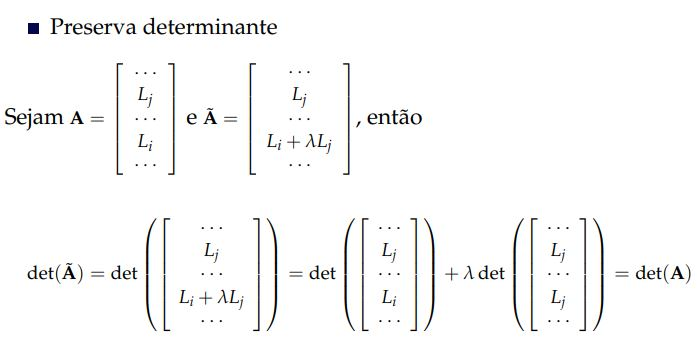

###Eliminação de Gauss 
Para obter esse sistema triangular superior precisamos zerar todos elementos abaixo dos elementos da diagonal realizando as operações explicadas acima (elementares que preservam o determinante):

A cada passo o objetivo é anular todos os elementos abaixo da diagonal $a_{ii}$, 

$\left[\begin{array}{ccc}
a_{11} & a_{12} & a_{13} & a_{1n} & |b_{1}\\
a_{21} & a_{22} & a_{23} & a_{2n} & |b_{2}\\
a_{31} & a_{32} & a_{33} & a_{3n} & |b_{3}\\
a_{n1} & a_{n2} & a_{n3} & a_{mn} & |b_{n}
\end{array}\right]$

então no primeiro passo o objetivo é sair com uma matriz da forma:

$\left[\begin{array}{ccc}
a_{11} & a_{12} & a_{13} & a_{1n} & |b_{1}\\
0 & a_{22} & a_{23} & a_{2n} & |b_{2}\\
0 & a_{32} & a_{33} & a_{3n} & |b_{3}\\
0 & a_{n2} & a_{n3} & a_{mn} & |b_{n}
\end{array}\right]$

com:

$L_i^2 <- L_i^1 + m_{i1}L_i^1$  com $m_{i1} = -a_{i1}/a_{11}$

Obtendo assim o termo geral:

Para k = 1, ..., n-1:
$L_i^{(k+1)} <- L_i^{(k)} + m_{ik}L_k^{(k)}$  com $m_{ik} = -a_{ik}^{(k)}/a_{kk}^{(k)}$

Após realizar todo esse processo finalmente se obtem um sistema triangular superior equivalente ao sistema inicial.

###Equivalência Gauss-fatoração LU

Para mostrar essa equivalência precisamos de armazaenar os $m_{ik}$ calculados no passo anterior, sendo que a matriz $m_{1}$ será a matriz formada pelos elementos $m_{i1}$, diagonal 1 e restante 0.

M1 = 
$\left[\begin{array}{ccc}
1 & 0 & 0 & 0\\
m_{21} & 1 & 0 & 0\\
m_{31} & 0 & 1 & 0\\
m_{41} & 0 & 0 & 1
\end{array}\right]$


Realiza esse processo para todas as $m_{n-1}$ matrizes

Conclusão: Eliminação de Gauss e Decomposição LU são
equivalentes.

Pois:
$Ux = m_{n-1}...m_{2}m_{1}b$
Esse conjunto de multiplicaçoes de $m_{i}$ forma 


$Ux = Mb$, 

logo $LUx = b$ com:

L = $M^-1$


$M^-1$ = $m_{1}$$m_{2}$...$m_{n-1}$ =
$\left[\begin{array}{ccc}
1 & 0 & 0 & 0\\
-m_{21} & 1 & 0 & 0\\
-m_{31} & -m_{32} & 1 & 0\\
-m_{41} & -m_{42}& -m_{43} & 1
\end{array}\right]$

Ambos são métodos diretos, ou seja, é possível obter-se a solução do sistema num número finito de operações. Tanto a decomposição LU quanto o método de Gauss são equivalentes, portanto possuem as mesmas restrições:


*   A deve ser não singular, de modo que suas colunas sejam linearmente independentes entre si, e b possa ser escrito de modo único como combinação linear das colunas de A
* O determinante das menores principais de A devem ser não nulos, para que esta possa ser decomposta em uma multiplicação de uma matriz triangular superior e uma triangular inferior únicas. 
* Ambos os métodos possuem complexidade 2n³/3

##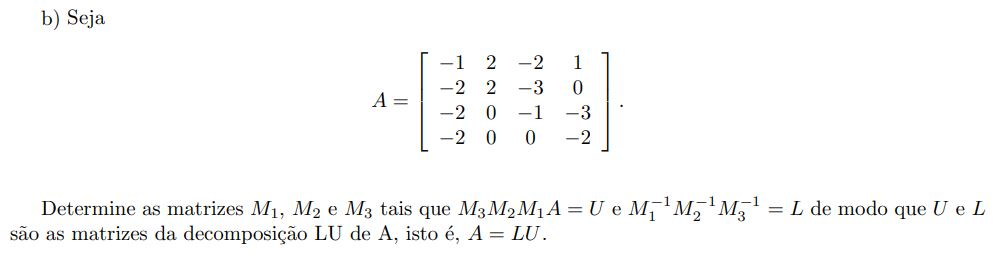


In [ ]:
import numpy as np

def decompLU(A):
     n = np.shape(A)[0]
     L = np.eye(n) 
     U = np.zeros((n,n))
     for k  in np.arange(n):
        for j in np.arange(k,n):
           U[k,j]=A[k,j]
           for s in np.arange(k):
               U[k,j] = U[k,j] - L[k,s]*U[s,j]
        for i in np.arange(k+1,n):
           L[i,k]=A[i,k]
           for s in np.arange(k):
               L[i,k] = L[i,k] - L[i,s]*U[s,k]
           L[i,k] = L[i,k]/U[k,k]
     return L, U  

def eliminacao_gauss(A):
    n = np.shape(A)[0]
    U = np.copy(A)
   
    M1 = np.zeros(np.shape(A))
    M2 = np.zeros(np.shape(A))
    M3 = np.zeros(np.shape(A))
  
    for i in np.arange(n):
        M1[i,i] = 1
        M2[i,i] = 1
        M3[i,i] = 1

    for k in np.arange(n):
        for i in np.arange(k+1,n):
            m = -U[i,k]/U[k,k]
            U[i,k:n] = U[i,k:n] + m*U[k,k:n]
            if k==0:
              M1[i,k] = m
            if k==1:
              M2[i,k] = m
            if k==2:
              M3[i,k] = m
   
    return U,M1,M2,M3

# Exemplo
A = np.array([
              [-1.0, 2.0, -2.0, 1.0],
              [-2.0, 2.0, -3.0, 0.0],
              [-2.0, 0.0, -1.0, -3.0],
              [-2.0, 0.0, 0.0, -2.0]], dtype="double")

U, M1,M2,M3 = eliminacao_gauss(A)

print("Matriz m1")
print(M1)

print("Matriz m2")
print(M2)

print("Matriz m3")
print(M3)


print("\n\n")
print("Matriz L calculada como,metodo de eliminacao de gauss L=M^-1:")
L = np.linalg.inv(M1)@np.linalg.inv(M2)@np.linalg.inv(M3)
print(L)
print("Matriz U calculada como,metodo de eliminacao de gauss:")
print(U)

print("\n\n")

L2,U2 = decompLU(A)

print("Matriz L calculada na decomposicao LU:")
print(L2)

print("Matriz U calculada na decomposicao LU:")
print(U2)



Matriz m1
[[ 1.  0.  0.  0.]
 [-2.  1.  0.  0.]
 [-2.  0.  1.  0.]
 [-2.  0.  0.  1.]]
Matriz m2
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0. -2.  1.  0.]
 [ 0. -2.  0.  1.]]
Matriz m3
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0. -2.  1.]]



Matriz L calculada como,metodo de eliminacao de gauss L=M^-1:
[[1. 0. 0. 0.]
 [2. 1. 0. 0.]
 [2. 2. 1. 0.]
 [2. 2. 2. 1.]]
Matriz U calculada como,metodo de eliminacao de gauss:
[[-1.  2. -2.  1.]
 [ 0. -2.  1. -2.]
 [ 0.  0.  1. -1.]
 [ 0.  0.  0.  2.]]



Matriz L calculada na decomposicao LU:
[[1. 0. 0. 0.]
 [2. 1. 0. 0.]
 [2. 2. 1. 0.]
 [2. 2. 2. 1.]]
Matriz U calculada na decomposicao LU:
[[-1.  2. -2.  1.]
 [ 0. -2.  1. -2.]
 [ 0.  0.  1. -1.]
 [ 0.  0.  0.  2.]]


Como podemos perceber nas últimas duas matrizes printadas o resultado da fatoração LU e da fatoração com eliminação de Gauss produz a mesma matriz L e consequentemente a mesma matriz U. Provando a demonstração da questão A de que as duas são equivalentes

##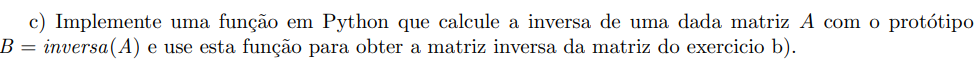

Para encontrar a inversa da matriz A, podemos resolver o sistema abaixo:

$Av_i = e_i$, $i = 1,...,n$

$A^{-1} = [v_1|v_2|...|v_n]$, em que v_i é a i-ésima coluna de A.


onde A é uma matriz quadrada não singular de tamanho n e $e_i$ é a o-ésima coluna da matriz identidade I.





In [ ]:
def decompLU(A):
     n = np.shape(A)[0]
     L = np.eye(n) 
     U = np.zeros((n,n))
     for k  in np.arange(n):
        for j in np.arange(k,n):
           U[k,j]=A[k,j]
           for s in np.arange(k):
               U[k,j] = U[k,j] - L[k,s]*U[s,j]
        for i in np.arange(k+1,n):
           L[i,k]=A[i,k]
           for s in np.arange(k):
               L[i,k] = L[i,k] - L[i,s]*U[s,k]
           L[i,k] = L[i,k]/U[k,k]
     return L, U   

def LUsolve(A,b):
   n = np.shape(A)[0]  
   L,U = decompLU(A)
   for k in range(1,n):
      b[k] = b[k] - L[k,0:k].dot(b[0:k])
   for k in range(n-1,-1,-1):
      b[k] = (b[k] - U[k,k+1:n].dot(b[k+1:n]))/U[k,k]
   return b

def inversa(A):
  n = np.shape(A)[0]
  B = np.zeros(np.shape(A))
  for i in np.arange(n):
    identidade = np.zeros(np.shape(A)[0])
    identidade[i] = 1
    x = np.linalg.solve(A, identidade)
    #x = LUsolve(A,identidade)
    B[:,i] = x
     
  return B

A = np.array([
              [-1.0, 2.0, -2.0, 1.0],
              [-2.0, 2.0, -3.0, 0.0],
              [-2.0, 0.0, -1.0, -3.0],
              [-2.0, 0.0, 0.0, -2.0]], dtype="double")

print("Matriz inversa calculada usando metodo explicado acima")
B = inversa(A)
print(B)

print("\n\n")

print("Matriz inversa calculada usando biblioteca numpy")
arr_inv = np.linalg.inv(A)
print(arr_inv)


Matriz inversa calculada usando metodo explicado acima
[[ 1.   -1.    1.   -1.  ]
 [ 2.5  -2.    1.   -0.25]
 [ 1.   -1.    0.    0.5 ]
 [-1.    1.   -1.    0.5 ]]



Matriz inversa calculada usando biblioteca numpy
[[ 1.   -1.    1.   -1.  ]
 [ 2.5  -2.    1.   -0.25]
 [ 1.   -1.    0.    0.5 ]
 [-1.    1.   -1.    0.5 ]]


# **Questão 2 - Sistemas Lineares - métodos iterativos**

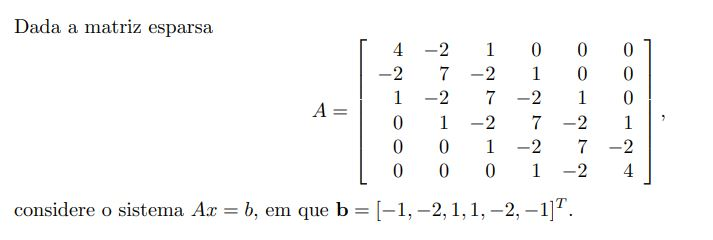

##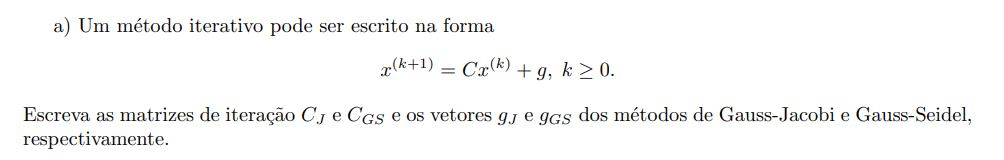

Dado uma matriz Ax = b e sendo necessário que $a_{ii} \neq 0$, i = 1,...n, temos:


$ a_{n1}x_1+a_{n2}x_2+...+a_{nn}x_n = b_n$



O método de **Gauss-Jacobi** transforma $Ax=b$ em $ x=Cx+g$ isolando cada coordenada $x_i$  do vetor x na i-ésima equação do sistema:

$ x_n = (b_n-a_{n1}x_1-a_{n2}x_2-...a_{n,n-1}x_{n-1})/a_{nn}$

Desta forma temos o sistema equivalente $x^{(k+1)} = Cx^{(k)} + g $

C=
$\left[\begin{array}{ccc}
0               & -a_{12}/a_{11} & -a_{13}/a_{11}  & a_{1n}/a_{11}  \\
-a_{21}/-a_{22} & 0              & -a_{23}/a_{22} & a_{2n}/a_{22}  \\
-a_{31}/a_{33}  & -a_{32}/a_{33} & 0              & a_{3n}/a_{33}  \\
-a_{n1}/a_{nn}  & -a_{n2}/a_{nn} & -a_{n3}/a_{nn}  & 0 
\end{array}\right]$


e
g = 
$\left[\begin{array}{ccc}
b_1 /a_{11}            \\
b_2 /a_{22}   \\
b_3 /a_{33}   \\
b_n /a_{nn}  
\end{array}\right]$


Forma de obter $x^{(K+1)} = Cx^{(k)} + g$, a partir de Ax =b em que D uma matriz diagonal formada pela diagonal de A:


$x^{(K+1)} = (I - D^{-1}A)x^k + D^{-1}b$


O método de **Gauss-Seidel** é uma maneira de acelar o método de Gauss-Jacobi No calculo de $x_i^{(k+1)}$ se usa os valores atualizados $x_1^{(k+1)}$... $x_{i-1}^{(k+1)}$ e os valores restantes $x_{i+1}^{(k)}$... $x_{n}^{(k)}$

$ x_n^{(k+1)} = (b_n-a_{n1}x_1^{(k+1)}-a_{n2}x_2-...a_{n,n-1}x_{n-1}^{(k+1)})/a_{nn}$

Forma de obter  $x^{(K+1)}=Cx^{(k)}+g$, a partir de Ax =b, considere que A = L+R em que L é a matriz triangular inferior de A e R é a matriz triangular superior de A sem a diagonal.

$ x^{(k+1)} = (-L^{-1}R)x^{(k)} + L^{-1}b$

Em que C = $(-L^{-1}R)$
e g = $L^{-1}b$

In [ ]:
import numpy as np
import math as m

# Gauss-Jacobi
def CalCGgauss_jacobi(A,b):
    n = np.shape(A)[0];
    D = np.diag(np.diag(A));
    aux_C = np.linalg.solve(D,A);
    C = np.eye(n) - aux_C;
    g = np.linalg.solve(D,b);
    
    return C,g

# Gauss-Seidel
def CalCGgauss_seidel(A,b):
    L = np.tril(A); 
    R = np.triu(A,1);
    C = -np.linalg.solve(L,R);
    g = np.linalg.solve(L,b);
    
    return C,g

A = np.array([[4, -2, 1, 0, 0, 0],  
              [-2, 7,-2, 1, 0 ,0 ],  
              [1, -2, 7, -2, 1, 0],
              [0, 1,  -2, 7, -2, 1],
              [0, 0, 1, -2, 7, -2],
              [0, 0, 0, 1, -2, 4]], dtype='double')

b = np.array([[-1, -2, 1, 1, -2, -1]]).T


Cj,gj = CalCGgauss_jacobi(A,b)
print("C usando Gauss-Jacobi")
print(Cj)
print("G usando Gauss-Jacobi")
print(gj)

print("\n\n")

Cgs,ggs = CalCGgauss_seidel(A,b)
print("C usando Gauss_seidel")
print(Cgs)
print("G usando Gauss_seidel")
print(ggs)

C usando Gauss-Jacobi
[[ 0.      0.5    -0.25    0.      0.      0.    ]
 [ 0.2857  0.      0.2857 -0.1429  0.      0.    ]
 [-0.1429  0.2857  0.      0.2857 -0.1429  0.    ]
 [ 0.     -0.1429  0.2857  0.      0.2857 -0.1429]
 [ 0.      0.     -0.1429  0.2857  0.      0.2857]
 [ 0.      0.      0.     -0.25    0.5     0.    ]]
G usando Gauss-Jacobi
[[-0.25  ]
 [-0.2857]
 [ 0.1429]
 [ 0.1429]
 [-0.2857]
 [-0.25  ]]



C usando Gauss_seidel
[[-0.      0.5    -0.25   -0.     -0.     -0.    ]
 [-0.      0.1429  0.2143 -0.1429 -0.     -0.    ]
 [-0.     -0.0306  0.0969  0.2449 -0.1429 -0.    ]
 [-0.     -0.0292 -0.0029  0.0904  0.2449 -0.1429]
 [-0.     -0.004  -0.0147 -0.0092  0.0904  0.2449]
 [-0.      0.0053 -0.0066 -0.0272 -0.016   0.1582]]
G usando Gauss_seidel
[[-0.25  ]
 [-0.3571]
 [ 0.0765]
 [ 0.2157]
 [-0.235 ]
 [-0.4214]]


##b)Verifique se os métodos de Gauss-Jacobi e Gauss-Seidel obtidos no item anterior convergem

Para o método de Gauss-Jacobi convergir para a solução de Ax=b, independente da escolha de $x^{(0)}$, deve satisfazer um dos critérios:

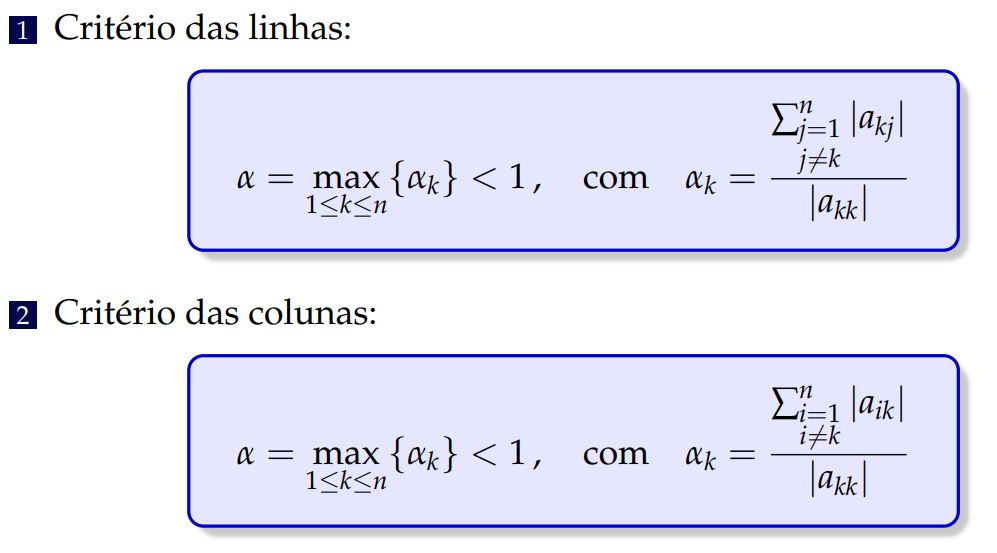

Para o método de Gauss-Seidel  convergir para a solução de Ax=b, independente da escolha de $x^{(0)}$, deve satisfazer:

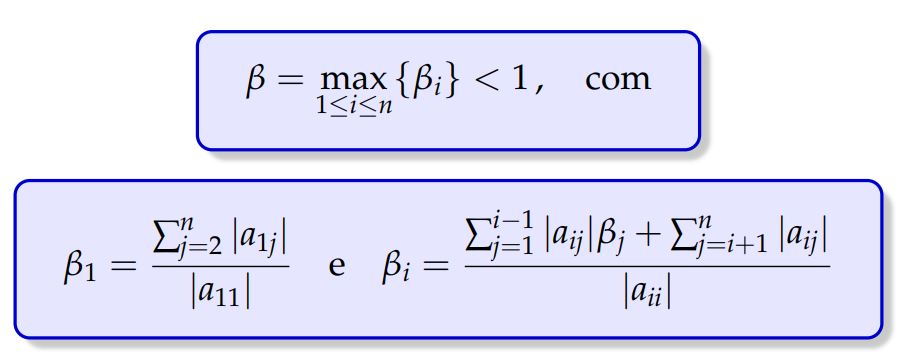

In [ ]:
def convergencia_gauss_jacobi(A):
  #criterio das linhas
  alphas = []
  n = A.shape[0]

  for k in range(n):
    alphaK = 0.0
    for j in range(n):
      if j!=k:
        alphaK += np.abs(A[k,j])
    alphaK = alphaK/np.abs(A[k,k])
    alphas.append(alphaK)

  maxAlpha = np.max(alphas)
  if maxAlpha < 1.0:
    return True
  
  #caso o criterio das linhas falhe usa criterio das colunas

  alphas = []
  for k in range(n):
    alphaK = 0.0
    for i in range(n):
      if i!= k:
        alphaK += np.abs(A[i,k])
    alphaK = alphaK / np.abs(A[k,k])
    alphas.append(alphaK)

  maxAlpha = np.max(alphas)
  if maxAlpha < 1.0:
    return True

  return False

def convergencia_gauss_seidel(A):
  beta0 = np.sum(np.abs(A[0,1:])) / np.abs(A[0,0])
  betas = []
  betas.append(beta0)
  n = A.shape[0]
  for i in range(1,n):
    betaI = 0.0
    for j in range(i):
      betaI += np.abs(A[i,j]*betas[j])
    for j in range (i+1,n):
      betaI += np.abs(A[i,j])
    betaI = betaI/np.abs(A[i,i])
    betas.append(betaI)
  
  maxBeta = np.max(betas)
  if maxBeta < 1.0:
    return True
  
  return False


print("Metodo de gauss-jacobi eh convergente?")

print('SIM'if convergencia_gauss_jacobi(A) else 'NÃO')

print("Metodo de gauss-seidel eh convergente?")

print('SIM'if convergencia_gauss_seidel(A) else 'NÃO')

Metodo de gauss-jacobi eh convergente?
SIM
Metodo de gauss-seidel eh convergente?
SIM


## c)Resolva numericamente o sistema Ax = b em questão usando os métodos de Gauss-Jacobi e GaussSeidel utilizando erro absoluto inferior a 1e−8 e chute inicial x0 = (1, 0, 0, 0, 0, 0). Discuta os resultados obtidos. Faça um gráfico erro X iterações.

Critério de parada:


Possue três critérios de parada e o que vamos usar nesse código é o critério de erro absoluto:


*   Erro absoluto: $||x^{(k+1)} - x^{(k)}||$ < ε




In [ ]:
import numpy as np
import math as m

# Gauss-Jacobi
def gauss_jacobi(A,b,x0,tol,flag):
    n = np.shape(A)[0]
    D = np.diag(np.diag(A))
    aux_C = np.linalg.solve(D,A);
    C = np.eye(n) - aux_C
    g = np.linalg.solve(D,b)
    kmax = 10000
    k = 0

    error = np.zeros(kmax)

    while k < kmax:

      x_anterior = x0
      x0 = C.dot(x0)+g
      error[k] = np.linalg.norm(x0 - x_anterior)
      if flag and error[k] < tol:
        break

      k = k+1;

    if (k == kmax and flag):
        print('\nErro: o método não converge.\n')
    
    x = x0;
    return x,k,error

# Gauss-Seidel
def gauss_seidel(A,b,x0,tol,flag):

    L = np.tril(A); R = np.triu(A,1)
    C = -np.linalg.solve(L,R)
    g = np.linalg.solve(L,b)
    kmax = 10000; k = 0

    error = np.zeros(kmax)
    x_anterior = x0

    while k < kmax:
      x_anterior = x0
      x0 = C.dot(x0) + g
      error[k] = np.linalg.norm(x0 - x_anterior)
      if flag and error[k] < tol:
        break
      k = k + 1

    if (k == kmax and flag):
        print('\nErro: o método não converge.\n')
    
    x = x0;
    return x,k,error


A = np.array([[4, -2, 1, 0, 0, 0],  
              [-2, 7,-2, 1, 0 ,0 ],  
              [1, -2, 7, -2, 1, 0],
              [0, 1,  -2, 7, -2, 1],
              [0, 0, 1, -2, 7, -2],
              [0, 0, 0, 1, -2, 4]], dtype='double')

b = np.array([[-1, -2, 1, 1, -2, -1]]).T

# Função Python
print('\nSolução Python:\n')
x = np.linalg.solve(A,b);
print(x);



# Métodos Iterativos
n = np.shape(A)[0];
x0 = np.array([[1, 0, 0, 0, 0, 0]]).T; 
tol = 1e-8;


print('\nSolução Gauss-Jacobi:\n')
(x_jacobi,k_jacobi,erro_jacobi) = gauss_jacobi(A,b,x0,tol,1);
print(x_jacobi);
print('%d iterações usadas' %(k_jacobi))



print('\nSolução Gauss-Siedel:\n')
(x_siedel,k_siedel,erro_seidel) = gauss_seidel(A,b,x0,tol,1);
print(x_siedel);
print('%d iterações usadas' %(k_siedel))




Solução Python:

[[-0.50442478]
 [-0.39823009]
 [ 0.22123894]
 [ 0.22123894]
 [-0.39823009]
 [-0.50442478]]

Solução Gauss-Jacobi:

[[-0.50442478]
 [-0.39823009]
 [ 0.22123894]
 [ 0.22123894]
 [-0.39823009]
 [-0.50442478]]
72 iterações usadas

Solução Gauss-Siedel:

[[-0.50442478]
 [-0.39823009]
 [ 0.22123894]
 [ 0.22123894]
 [-0.39823009]
 [-0.50442478]]
14 iterações usadas


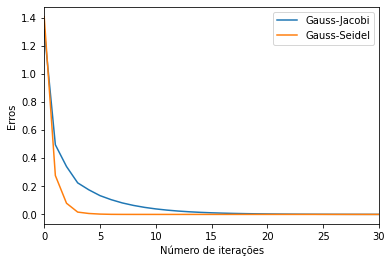

In [ ]:
plt.plot(erro_jacobi, label = "Gauss-Jacobi")
plt.plot(erro_seidel, label = "Gauss-Seidel")
plt.xlim(0,30)
plt.ylabel("Erros")
plt.xlabel("Número de iterações")
plt.legend(loc="best")


Ambos os métodos convergem para a solução de Ax = b como esperado teoricamente, pois ao usar a biblioteca do python para solucionar o sistema obtemos a mesma resposta que usando o método de Gauss-seidel e de Gauss-Jacobi.

Como tabém é esperado teoricamente o método de Gauss-seidel converge para a solução de forma mais rápida que o de Gauss-Jacobi pois no cálculo de $x_i^{(k+1)}$ se usa os valores atualizados $x_1^{(k+1)}$... $x_{i-1}^{(k+1)}$ e os valores restantes $x_{i+1}^{(k)}$... $x_{n}^{(k)}$

#**Questão 3 Problemas de autovalor**

## a) Faça um resumo teórico dos métodos de Francis; da potência e da potência inversa.

### **Francis**

O método de Francis é usado para calcular todos os autovalores e os autovetores de uma matriz A ∈ M[n,n] simétrica, ou seja, nela vale o Teorema Espectral, então os autovalores são reais e autovetores ortogonais. Dessa forma, pode-se aplicar a decomposição QR para calcular todos os seus autovalores e autovetores.

1.   Adotando-se $A_{1} = A$, pode-se calcular a decomposição QR. Obtendo $A_{1} = Q_{1} * R_{1}$
2.   $A_{2} = R_{1} * Q_{1}$
3. Aplicando-se decomposição QR novamente, em $A_{2}$, tem-se $A_{2} = Q_{2} * R_{2}$
4. $A_{3}$, analogamente aos passos anteriores, será $A_{3} = R_{2}*Q_{2}$
5. Então, generalizando, tem-se: $A_{k} = R_{k-1} * Q_{k-1}$


As matriz A e Ak possuem os mesmos autovalores, como se pode perceber pela demonstração abaixo:

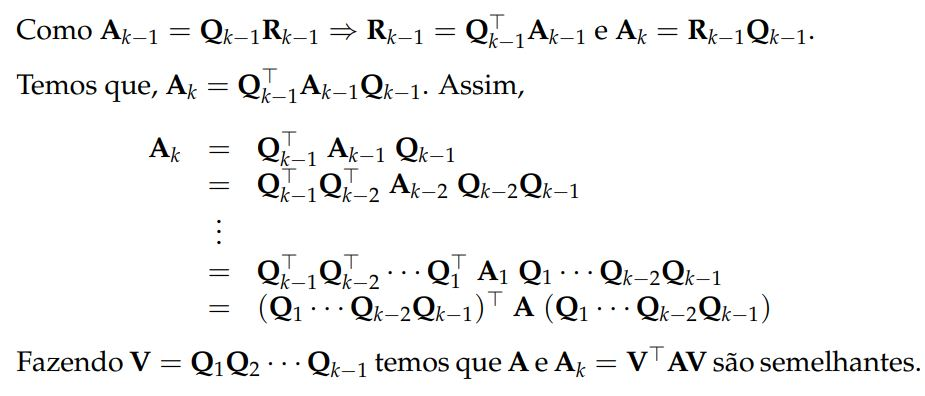

A sequência Ak converge para uma matriz diagonal.

Logo, os elementos da diagonal de Ak fornecem uma aproximação para
os autovalores de A, enquanto que as colunas da matriz oferecem uma aproximação dos autovetores da matriz:

$V = Q_{1} * Q_{2} * ... * Q_{k-1}$


Critérios de parada:


Dados ε > 0 e kmax ∈ N, temos:



1.   k = kmax
2.   $max_{i < j}$ ${|a_{ij}|}$ < $\epsilon$
3.   off(A) < ε, com 


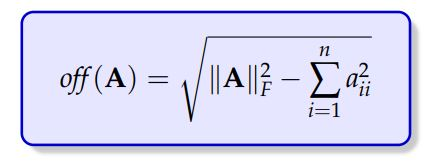

###**Método das Potências**

Seja A $\in$ $M(n,n)$, isto é, A possui autovalores $\lambda_1$, ..., $\lambda_n$ associados um conjunto de autovetores {$v_1$,$v_2$,...$v_n$} $\subset$ L.I (com $||v_i||$ = 1, $∀i$

Além disso, devemos assumir que o autovalor 1 ($\lambda_1$) é o maior autovalor de todos em módulo.

Objetivo: 

Calcular o autovalor dominante $\lambda_1$ e o seu autovetor associado a $v_1$

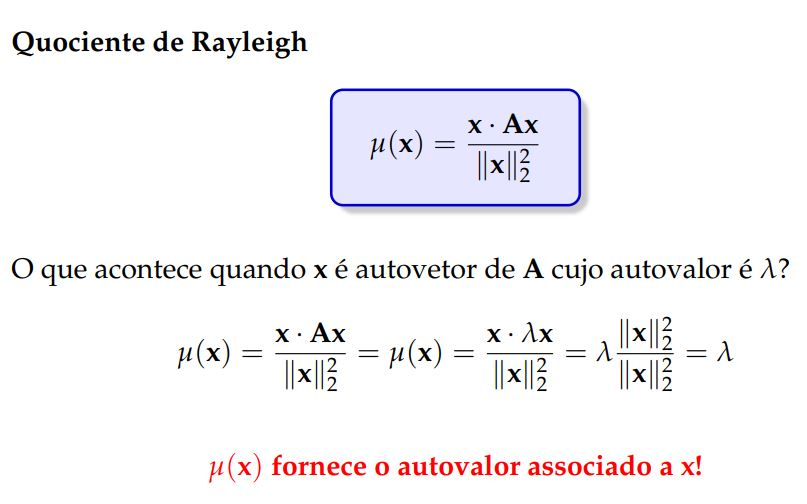

Dado um chute inicial $x^{(0)}$ ∈ Rn
(nao-nulo), calcule  $y^{(0)}$ = $x^{(0)}$/$||$x^{(0)}$||$

Para k = 1, 2, . . . faça:

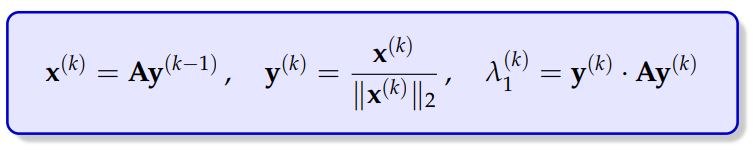


*   O $y^{(k)}$ obtido é o autovetor associado a $\lambda_1$ que é o maior autovalor de A

Critérios de parada:


Dados ε > 0 e kmax ∈ N, temos:



1.   k = kmax
2.   |$\lambda_1^{(k+1)}$- $\lambda_1^{(k)}$| < ε
3.   teste de alinhamento (|cosθ|≈ 1): ||$y^{(k+1)}.y^{(k)}$|-1|<ε


###**Método das Potências Inversa**

Seja A $\in$ $M(n,n)$, inverttível, vamos assumir que o autovalor 1 ( λn ) é o menor autovalor de todos em módulo.

Objetivo: Calcular λn e seu vetor associado $V_n$

Note que 

$Av_j = \lambda_j v_j$, logo
$A^{-1}v_j = (1/\lambda_j) v_j$

Logo, 1/$\lambda_n$ é o autovalor dominante de $A^{-1}$, que é justamente o autovalor que estamos procurando

Dado um chute inicial $x^{(0)}$ ∈ Rn
(nao-nulo), calcule  $y^{(0)}$ = $x^{(0)}$/$||$x^{(0)}$||$

Para k = 1, 2, . . . faça:

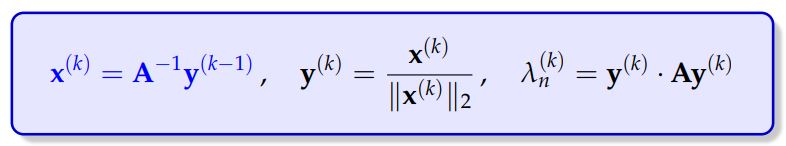



*   Deve-se resolver o sistema linear $Ax^{(k)} = y^{(k-1)}$ a cada iteração
*   O $y^{(k)}$ obtido é o autovetor associado a $\lambda_n$ que é o menor autovalor de A






Critérios de parada (mesmo que os do método das potências):


Dados ε > 0 e kmax ∈ N, temos:



1.   k = kmax
2.   |$\lambda_1^{(k+1)}$- $\lambda_1^{(k)}$| < ε
3.   teste de alinhamento (|cosθ|≈ 1): ||$y^{(k+1)}.y^{(k)}$|-1|<ε

## 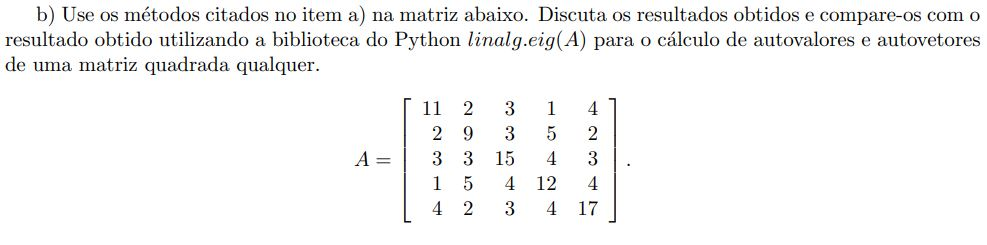

In [ ]:
# Potência
def potencia(A,tol):
    k = 0; kmax = 10000; erro = np.inf;
    n = np.shape(A)[0]; y0 = np.zeros(n); y0[0] = 1;

    while(erro > tol and k < kmax):
        x = A.dot(y0);
        y = x/np.linalg.norm(x);
        erro = np.abs(np.abs(y0.dot(y))-1);
        y0 = y; 
        k = k+1;
    
    lambda_ = y.dot(A.dot(y));
    return lambda_, y, k

#Potência Inversa
def potencia_inv(A,tol):
    k = 0; kmax = 10000; erro = np.inf;
    n = np.shape(A)[0]; y0 = np.zeros(n); y0[0] = 1;

    while(erro > tol and k < kmax):
        x = np.linalg.solve(A,y0);
        y = x/np.linalg.norm(x);
        erro = np.abs(np.abs(y0.dot(y))-1);
        y0 = y; k = k+1;

    lambda_ = y.dot(A.dot(y));
    return lambda_, y, k

# QR 
def clgsQR(A):
    (m,n) = np.shape(A);
    Q = np.zeros((m,n));
    R = np.zeros((n,n));

    for j in np.arange(n):
        V = A[:,j];
        for i in np.arange(j):
            R[i,j] = Q[:,i].dot(A[:,j]); 
            V = V - R[i,j]*Q[:,i];
        R[j,j] = np.linalg.norm(V);
        Q[:,j] = V/R[j,j];

    return Q,R

# QR modificado
def mgsQR(A):
    (m,n) = np.shape(A);
    V = np.copy(A); 
    Q = np.zeros((m,n));
    R = np.zeros((n,n));

    for j in np.arange(n):
        for i in np.arange(j):
            R[i,j] = Q[:,i].dot(V[:,j]); 
            V[:,j] = V[:,j] - R[i,j]*Q[:,i];
        R[j,j] = np.linalg.norm(V[:,j]);
        Q[:,j] = V[:,j]/R[j,j];

    return Q,R

def francis(A,tol,flag):
    if flag == 'classico':
        print('QR',flag,'\n')
        qr = clgsQR;
    if flag == 'modificado':
        print('QR',flag,'\n')
        qr = mgsQR;
    if flag == 'python':
        print('QR',flag,'\n')
        qr = np.linalg.qr;
    
    n = np.shape(A)[0];
    A_local = np.copy(A);
    V = np.eye(n);
    erro = np.inf

    while erro > tol:
        [Q,R] = qr(A_local);
        A_local = R.dot(Q);
        V = V.dot(Q);

        erro = np.max(np.max(np.abs(np.tril(A_local,-1))));
    
    D = np.diag(A_local);

    return D,V



A = np.array ([[11,2,3,1,4],
              [2,9,3,5,2],
              [3,3,15,4,3],
              [1,5,4,12,4],
              [4,2,3,4,17]], dtype='double')

(D_python,V_python) = np.linalg.eig(A); # usando uma função pronta para calcular todos os autovalores
idx = D_python.argsort()[::-1]
D_python = D_python[idx]
V_python = V_python[:,idx]

print('Metodo das potencias')
print('Cálculo do maior autovalor em módulo de A')
(lambda_,y,k) = potencia(A,0.000001)

print('Potência: %.4f  usando %d iterações' %(lambda_,k))
print('Python: %.4f\n' %(np.max(abs(D_python))))

print('Cálculo do autovetor associado com maior autovalor em módulo de A')
print(y)
print('Cálculo do autovetor associado com maior autovalor em módulo de A em python')
print(V_python[:,0])

print("\n\n\n")

print('Metodo das potencias inversa')
print('Cálculo do menor autovalor em módulo de A')
(lambda_inv,y,k) = potencia_inv(A,0.000001)
print('Potência Inversa: %.4f  usando %d iterações' %(lambda_inv,k))
print('Python: %.4f\n' %(np.min(abs(D_python))))
print('Cálculo autovetor associado com menor autovalor em módulo de A')
print(y)
print('Cálculo do autovetor associado com menor autovalor em módulo de A de python')
print(V_python[:,-1])


print("\n\n\n")


print('Método de Francis\n')

tol = 0.000001; flag = 'python';
(D,V) = francis(A,tol,flag);

print('Cálculo dos autovalores com o metodo de Francis')
print(D)
print('Cálculo dos autovalores com o python')
print(D_python)

print('Cálculo dos autovetores com o metodo de Francis')
print(V_python)
print('Cálculo dos autovetores com o python')
print(V)
print("\n")



Metodo das potencias
Cálculo do maior autovalor em módulo de A
Potência: 26.0252  usando 10 iterações
Python: 26.0252

Cálculo do autovetor associado com maior autovalor em módulo de A
[0.32774274 0.32570306 0.49802268 0.44710304 0.58187155]
Cálculo do autovetor associado com maior autovalor em módulo de A em python
[0.32743522 0.32598403 0.49833057 0.4474816  0.58133247]




Metodo das potencias inversa
Cálculo do menor autovalor em módulo de A
Potência Inversa: 4.8740  usando 13 iterações
Python: 4.8739

Cálculo autovetor associado com menor autovalor em módulo de A
[ 0.26841677 -0.74080601 -0.05080944  0.59498958 -0.15021552]
Cálculo do autovetor associado com menor autovalor em módulo de A de python
[ 0.26726603 -0.74142854 -0.05017271  0.59491453 -0.14970633]




Método de Francis

QR python 

Cálculo dos autovalores com o metodo de Francis
[26.02517458 13.50053662 10.93677451  8.66356791  4.87394638]
Cálculo dos autovalores com o python
[26.02517458 13.50053662 10.93677451  8.663

Os valores obtidos utilizando os métdos Francis; da potência e da potência inversa foram bem satisfatórios, sendo aproximadamente iguais aos valores obtidos usando a biblioteca do python *linalg.eig*. O único valor que se deu diferente foi o dos autovetores do metodo de Francis, em que se diferenciam do de Python por um sinal de -, o que não afeta faz diferença quando se tratam de autovetores, visto que fazer uma operação de escala em um autovetor não altera a direção dele.

# **Questão 4**

## **Decomposição SVD com aplicação para compressão de imagem**



### Decomposição SVD 

A decomposição SVD (decomposição em valores singulares) ou singular value decomposition (SVD) é a fatoração de uma matriz, com diversas aplicações importantes em processamento de sinais e estatística.

Formalmente, a decomposição em valores singulares de uma matriz m×n A é uma fatoração ou fatorização na forma:

> *A = UΣV* 


Onde U é uma matriz ortogonal m×m, Σ é uma matriz retangular diagonal m×n com números reais não-negativos na diagonal, e V* (é a transposta de V) é uma matriz ortogonal n×n real ou complexa. As entradas diagonais σi,i de Σ são os chamados valores singulares de A. 

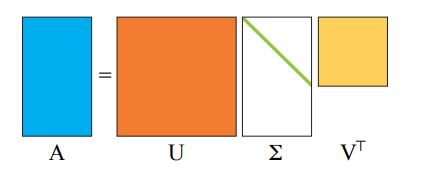








Toda matriz A ∈ M(m, n) de posto p > 0 possui decomposição SVD, isto é, A = UΣV* com σ1 ≥ σ2 ≥ · · · ≥ σp > 0.

Uma forma singela de calcular a decomposição SVD de A é utilizando o metodo de Francis nas matrizes simétricas ATA e AAT, pois:

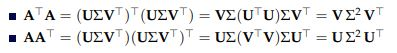

Note que a diagonal de Σ^2
é formada pelo quadrado dos valores singulares de A, isto e, σ^2, então para obter Σ é necessário tirar a raiz quadrada

### **Aplicação de SVD - compressão de imagem**

Entrada: uma imagem I de m × n pixels (grayscale)

1.   representar I como A ∈ M(m, n), 0 ≤ aij ≤ 1;
2.   compressao via SVD: trocar A por Ak
3.   Ak possui apenas os k primeiros valores singulares de A
4.   armazenamos k(m + n + 1) numeros ao invés de mn.









In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import math as math
from scipy.linalg import sqrtm
import scipy.linalg

drive.mount('/content/drive') #acesso ao drive


Mounted at /content/drive


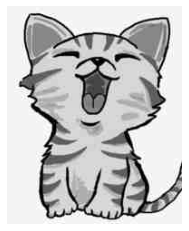

In [ ]:
#Imagem menor para ser usada no metodo calculado de decomposição SVD Francis
A = plt.imread('/content/drive/MyDrive/Colab Notebooks/Capturar_Easy-Resize.com.jpg')
A = rgb2gray(A) #descomentar se a imagem não for grayscale   
A = im2double(A)

figure = plt.imshow(A, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
figure.axes.set_axis_off()


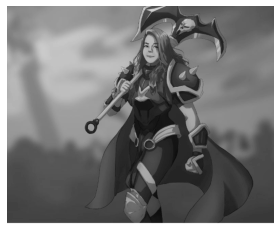

In [ ]:
#imagem para ser usada no metodo de decomposição SVD com a biblioteca do python
B = plt.imread('/content/drive/MyDrive/Colab Notebooks/Clara.JPG')
B = rgb2gray(B) #descomentar se a imagem não for grayscale   
B = im2double(B)

figure = plt.imshow(B, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
figure.axes.set_axis_off()

In [ ]:
def im2double(im):
    min_val = np.min(im.ravel())
    max_val = np.max(im.ravel())
    out = (im.astype('float') - min_val) / (max_val - min_val)
    return out

In [ ]:
#se a imagem não for em grayscale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [ ]:
# QR modificado
def mgsQR(A):
    (m,n) = np.shape(A);
    V = np.copy(A); 
    Q = np.zeros((m,n));
    R = np.zeros((n,n));

    for j in np.arange(n):
        for i in np.arange(j):
            R[i,j] = Q[:,i].dot(V[:,j]); 
            V[:,j] = V[:,j] - R[i,j]*Q[:,i];
        R[j,j] = np.linalg.norm(V[:,j]);
        Q[:,j] = V[:,j]/R[j,j];

    return Q,R

In [ ]:
def francis(A,tol):
    n = np.shape(A)[0];
    A_local = np.copy(A);
    V = np.eye(n);
    erro = np.inf

    while erro > tol:
        [Q,R] = scipy.linalg.qr(A_local);
        A_local = R@Q;
        V = V@Q;

        erro = np.max(np.max(np.abs(np.tril(A_local,-1))));
    
    D = np.diag(A_local);

    return V,D

In [ ]:
def mySvd(A):
  tol = 1e-5;
  (m,n) = np.shape(A);
  k = min(m,n);
  S = np.zeros((m,n));
  U,_= francis(A@A.T, tol)
  V,D = francis(A.T@A, tol)
  S[0:k,0:k] = np.diag(np.sqrt(D))
  

  return U,S,V

In [ ]:
def compresao():
  j = 0
  for k in (10,50,100):
    Ak = U[:,:k] @ S[0:k,:k] @ V[:k,:]
    plt.figure(j+1)
    j +=1
    figure = plt.imshow(Ak, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    plt.title('k ='+ str(k))
    figure.axes.set_axis_off()
    

  plt.savefig("/content/drive/MyDrive/Colab Notebooks/maca.jpeg") #caso queira salvar a figura

Compresao com SVD calculado pelo metodo de Francis:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


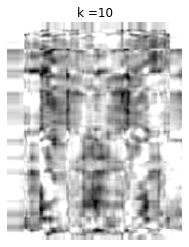

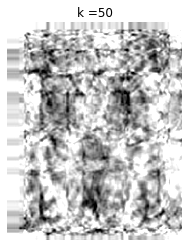

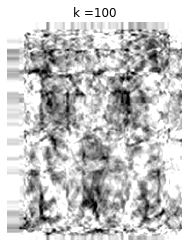

In [ ]:
#SVD usando o metodo de francis
U,S,V = mySvd(A)
V = -V.T
print("Compresao com SVD calculado pelo metodo de Francis:")
compresao()

Por a metodo de Francis ser um método singelo de calcular a decomposição SVD, várias informações da imagem são perdidas no caminho, mostrando uma "sombra" do que era a imagem original.

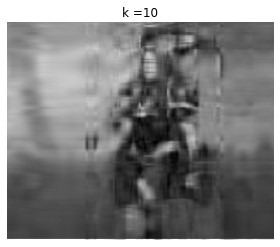

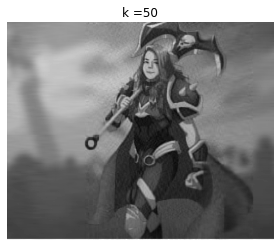

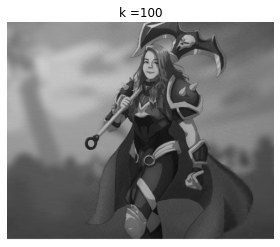

In [ ]:
#SVD DO Python
U,S,V = np.linalg.svd(B, full_matrices=False)
S = np.diag(S) 
compresao()

Ao usar o metódo de decomposição SVD direto da biblioteca do python a compresão da imagem fica bem melhor, fora o fato de o algoritmo rodar bem mais rápido mesmo para imagens grandes.

Como é notável quanto menor o K menor a resolução das imagens, mas também menor é a memória ocupada pela imagem.

## **Metódo das Potências - aplicação: PageRank**



**Page Rank**
PageRank é um algoritmo utilizado pela ferramenta de busca Google para posicionar websites entre os resultados de suas buscas. 

O PageRank mede a importância de uma página contabilizando a quantidade de links apontando para ela.

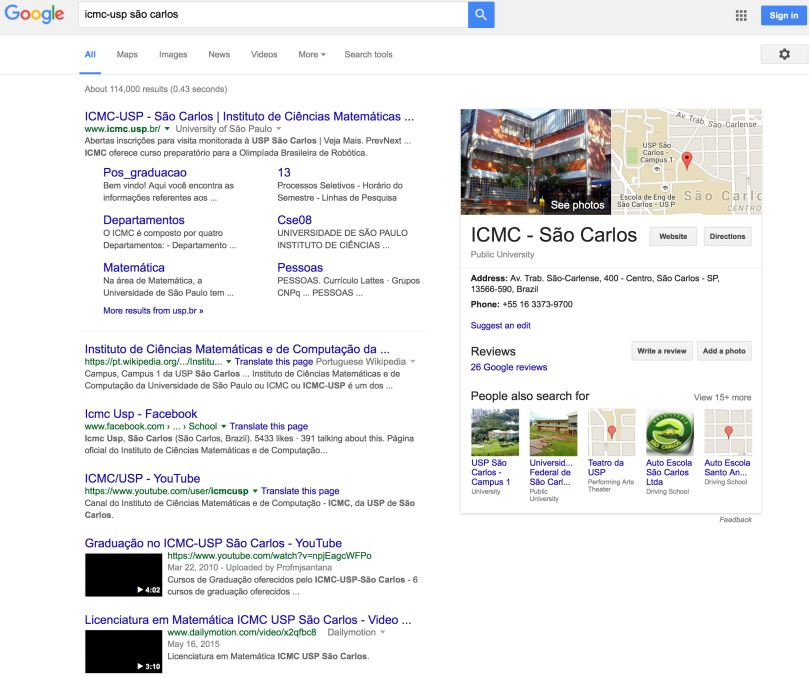

Páginas da web podem ser representadas como um grafo direcionado. 
1. uma pagina é importante se páginas importantes têm link para ela;
2. eleicão: um link de A → B é um voto de A para B;
3. visão probabilística do Pagerank: e a probabilidade de uma página web 
ser visitada em certo instante de tempo durante um passeio aleatório
infinito.

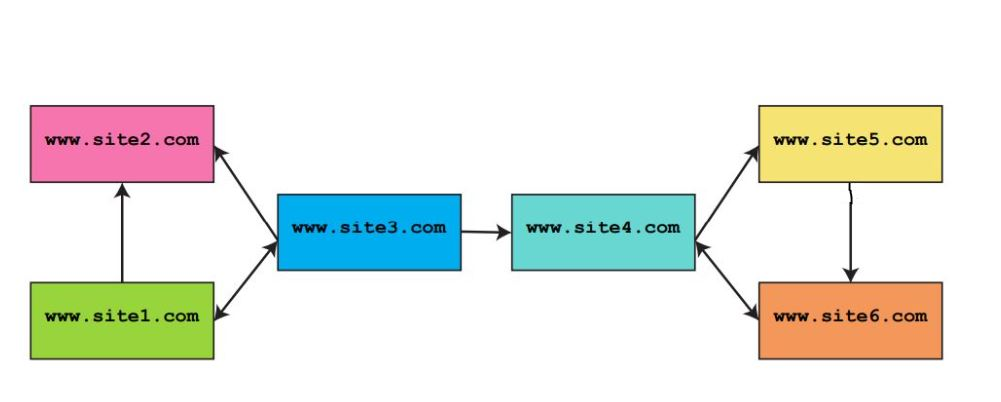

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

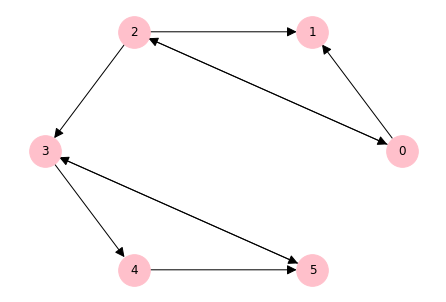

In [ ]:
#adicionando o grafo que representa os sites
g = nx.DiGraph()
g.add_nodes_from([0,1,2,3,4,5])
g.add_edge(0,1)
g.add_edge(0,2)
g.add_edge(2,0)
g.add_edge(2,1)
g.add_edge(2,3)
g.add_edge(3,4)
g.add_edge(3,5)
g.add_edge(4,5)
g.add_edge(5,3)



options = {
    'node_color': 'pink',
    'node_size': 1000,
    'width': 1,
    'arrowstyle': '-|>',
    'arrowsize': 20,
}

npos=nx.circular_layout(g,scale=1)

nx.draw(g,pos = npos, with_labels=True, **options, arrows=True)
plt.show()

In [ ]:
A = nx.to_numpy_matrix(g)
print(A.T)

[[0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0.]]


Para realizar a conta do PageRank é necessário transformar essa matriz em uma matriz de probabilidade de transição que é uma matriz quadrada que tem duas características: 
1. todas as entradas são não-negativas 
2. todas as colunas tem soma de entradas igual a 1. 

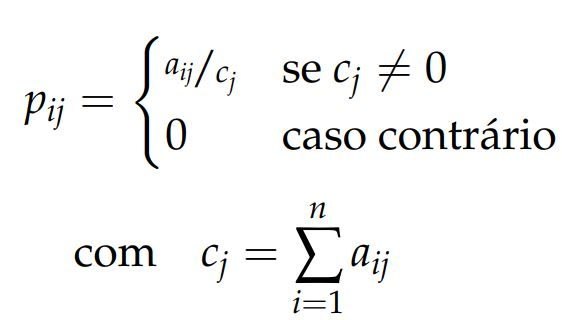

Para resolver os "becos sem saída", como por exemplo a posição 1 abaixo, utilizamos a seguinte formula:

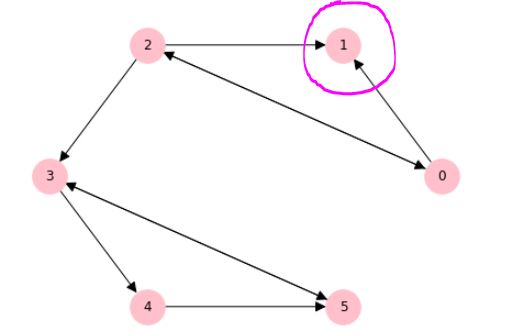

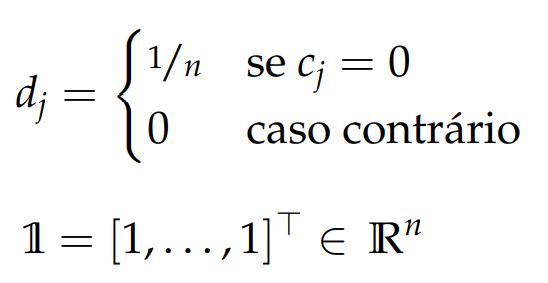 

In [ ]:
N = A.shape[0]
P = np.zeros((N,N))
for i in range(0,N):
    for j in range(0,N):
        if(np.sum(A[i,:]) > 0):
            P[i,j] = A[i,j]/np.sum(A[i,:])
        else:
            P[i,j] = 1/N
print(P.T)

[[0.         0.16666667 0.33333333 0.         0.         0.        ]
 [0.5        0.16666667 0.33333333 0.         0.         0.        ]
 [0.5        0.16666667 0.         0.         0.         0.        ]
 [0.         0.16666667 0.33333333 0.         0.         1.        ]
 [0.         0.16666667 0.         0.5        0.         0.        ]
 [0.         0.16666667 0.         0.5        1.         0.        ]]


Agora precisamos evitar ciclos no grafo, como o abaixo, modificando-o de modo a
tornar o grafo irredutível:

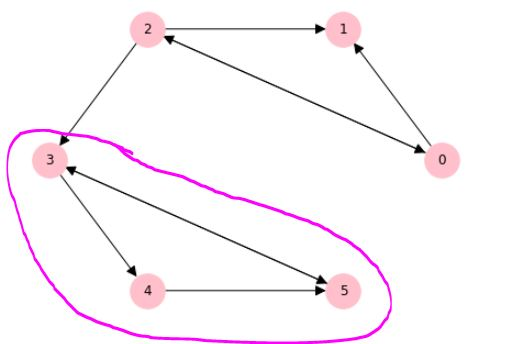

Para isso utilizamos a seguinte fórmula:

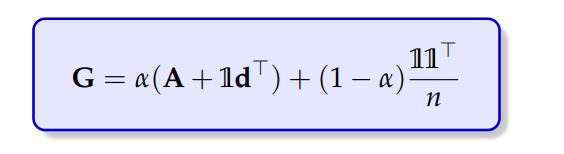

In [ ]:
G = np.zeros((N,N))
alpha = 0.85
for i in range(0,N):
    for j in range(0,N):
        G[i,j] = alpha*P[i,j] + (1-alpha)/N
G = G.T
print(G)

[[0.025      0.16666667 0.30833333 0.025      0.025      0.025     ]
 [0.45       0.16666667 0.30833333 0.025      0.025      0.025     ]
 [0.45       0.16666667 0.025      0.025      0.025      0.025     ]
 [0.025      0.16666667 0.30833333 0.025      0.025      0.875     ]
 [0.025      0.16666667 0.025      0.45       0.025      0.025     ]
 [0.025      0.16666667 0.025      0.45       0.875      0.025     ]]


**Metódo das Potências**

A aplicação do PageRank utiliza uma matriz estocástica, ou seja uma matriz M(m,n):


1.  todas as entradas são não-negativas e 
2.  todas as colunas tem soma de entradas igual a 1. 

Se A ∈ M(n, n) e p ∈ Rn são estocásticos então:


1.   O vetor Ap ∈ Rn é estocástico;
2.   λ = 1 é um autovalor de A

**Teorema de Perron-Frobenius**
Seja A ∈ M(n, n) uma matriz estocástica, então:
1 λ = 1 é o autovalor dominante de A;
2 O autovetor v associado a λ possui todas entradas positivas ou negativas.
Em particular, para λ existe um único autovetor que é estocástico.

Portanto, a convergencia do Processo de Markov é assegurada graças 
ao Método das Potências, isto é,

    p^(k) → v 

O autovetor v e chamado de vetor estacionário de A





In [ ]:
def potencias_markov(A, tol):
  k = 0; 
  kmax = 1000; 
  erro = 10000000.0;
  n = A.shape[1]; 
  y0 = np.ones(n)/n;
 
  
  while (erro>tol) and (k<kmax):
    y = A@y0;
    erro = abs(abs(y0.T @ y)-1);
    y0 = y; k = k+1;
  return y


In [ ]:
stationary = potencias_markov(G,1e-6)

for i in range (0,N):
  print(i, ':' , stationary[i])
indx=np.argsort(-stationary)
print(indx)

0 : 0.051704745757021386
1 : 0.07367926270375547
2 : 0.057412412496432835
3 : 0.32389172491855334
4 : 0.1730918786400839
5 : 0.3202199754841552
[3 5 4 1 2 0]


In [ ]:
#metodo calculado pelo python para o mesmo grafo acima
print(f"PageRank do grafo calculado pelo python:\n{nx.pagerank(g, alpha=0.85, max_iter=1000)}")
indx=np.argsort(-stationary)
print(indx)

PageRank do grafo calculado pelo python:
{0: 0.05170521641392591, 1: 0.07368008051507971, 2: 0.05741296072382751, 3: 0.32389011695861386, 4: 0.1730916786693209, 5: 0.32021994671923193}
[3 5 4 1 2 0]


Como se pode perceber o pagerank calculado pela biblioteca do python e o método implementado utilizando o Metodo das Potências produzem o mesmo resultado.

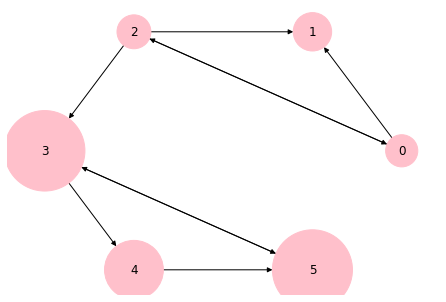

In [ ]:
npos=nx.circular_layout(g,scale=1)

s = stationary*20000
options = {
    'node_color': 'pink',  
}
nx.draw(g,pos = npos, with_labels=True, **options, node_size = s, arrows=True)
plt.show()